# Predicting House Prices Using Linear Regression
In this project Bengaluru House price data is being used which is available on Kaggle in .csv format <br>
The data is submitted by Mr. AmitabhaChakraborty<br>
The data contains Bengaluru's housing data which we are going to use for predicting house price in bengaluru

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (10,10)

## Loading the Dataset

In [3]:
df=pd.read_csv('Bengaluru_House_Data.csv') #importing the dataset

In [4]:
df.head() #looking at the head of it to get an idea about the dataset

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df.info() #getting the basic info about the dataset like the datatypes and other things

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
df.shape #by shape it is clear that the dataset has 13320 rows and 9 columns 

(13320, 9)

In [7]:
#by looking at the dataset we came to know that a various kind of properties that are given
#let's look at the area type
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [8]:
df2=df.drop(['area_type','availability','society','balcony'],axis='columns') #droppind some columns which are not important 

In [9]:
df2

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


## Handling Null Values

## Question1 - How many null values does dataset have and what should be it's solution?

In [10]:
df2.isna().sum() #Total number of null values in all columns 

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [11]:
#As the column bath have 73 null values which can be replaced with the median of the column
df2['bath']=df2['bath'].fillna(df2.bath.median()) 

In [12]:
df2.isna().sum() 
#the remaining null values are very small in number so i can simply drop them

location       1
size          16
total_sqft     0
bath           0
price          0
dtype: int64

In [13]:
df3=df2.dropna() #Dropping all the rows which have null values 

In [14]:
df3.isnull().sum() #new dataframe with 0 null values

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

## Feature Engineering

In [15]:
#now looking at the size of the house
df3['size'].unique()
#Here some them are reffered as BHK and some are reffered with just Bedrooms

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [16]:
df3['BHK']=df3['size'].apply(lambda x : int(x.split(' ')[0]))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
df3['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [18]:
df3.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [19]:
df3['total_sqft'].unique() #here also this column doesn't have similar values 

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [20]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
#here we wrote a function that if the values is float it will return True otherwise False

In [21]:
df3[~df3['total_sqft'].apply(is_float)]
#so we have 239 rows with different type of values of total_sqft which needs to be changed 

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,2.0,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,2.0,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
...,...,...,...,...,...,...
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13240,Devanahalli,1 BHK,1020 - 1130,2.0,52.570,1
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


#### In the dataframe the total_sqft columns also have some values which are showing a particular range of the area, to takle this proble we are going to replace the range with it's average(max+min)/2, Here we have created a function which takes the string as as input and Splits it from the - sign also the function considers the minimum value at index 0 and the maximum value at index 1 and uses it to calculate the average value and covert it into float 

In [22]:
def convert_avr(x): #defining the fuction for calculating the average
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2  #calculating the average
    try:
        return float(x)
    except:
        return None

In [23]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_avr) #function applied
df4 = df4[df4.total_sqft.notnull()]
df4.head(2)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4


## Question2 - What would be the price of Square per feet?

In [24]:
#calculating the price per sq. feet
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft'] #divided with 100000 because the price is given in Lakh
df5.price_per_sqft.sample(5)

6511     5428.571429
5390     4575.471698
10987    4207.119741
8405     6808.278867
4471     3255.813953
Name: price_per_sqft, dtype: float64

In [25]:
df5.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [26]:
location_stats = df5['location'].value_counts(ascending=False)
location_stats

Whitefield             537
Sarjapur  Road         397
Electronic City        302
Kanakpura Road         271
Thanisandra            233
                      ... 
Abshot Layout            1
Ganganahalli             1
CQAL LAYOUT C BLOCK      1
Dominic Layout           1
T R Mill Road            1
Name: location, Length: 1298, dtype: int64

In [27]:
df5.location = df5.location.apply(lambda x: x.strip()) 
#Applying strip function to remove all  the leading and trailing characters from the string
location_stats = df5['location'].value_counts(ascending=False)
location_stats

Whitefield                      538
Sarjapur  Road                  397
Electronic City                 304
Kanakpura Road                  271
Thanisandra                     236
                               ... 
T K Reddy Layout                  1
Laxminarayana Layout              1
Byappanahalli                     1
EPIP AREA, WHITEFIELD             1
Binny Mills Employees Colony      1
Name: location, Length: 1287, dtype: int64

In [28]:
location_stats.values.sum() 

13257

In [29]:
len(location_stats[location_stats>10]) 
#The locations which have more than 10 datapoints are only 240
#we will keep these only as indivisuals
# Will keep all the other ones in a single column

240

In [30]:
len(location_stats)

1287

In [31]:
len(location_stats[location_stats<=10])

1047

In [32]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Sadashiva Nagar                 10
Ganga Nagar                     10
Nagappa Reddy Layout            10
Dodsworth Layout                10
Basapura                        10
                                ..
T K Reddy Layout                 1
Laxminarayana Layout             1
Byappanahalli                    1
EPIP AREA, WHITEFIELD            1
Binny Mills Employees Colony     1
Name: location, Length: 1047, dtype: int64

In [33]:
location_stats_less_than_10.count()

1047

## Outlier Removal

In [34]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
# Those locations which have less than 10 datapoints are categorised as other

In [35]:
df5.head(10)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


#### We have 744 datapoints which are unusual according to the size per room, So these datapoints can be cosidered as outliers which should be removed from the dataframe

In [36]:
len(df5[df5.total_sqft/df5['BHK']<300]) 
#number of houses having less than 300sqft per room

744

In [37]:
#removing the outliers from the dataframe
df6 = df5[~(df5.total_sqft/df5['BHK']<300)]
df6.shape

(12513, 7)

## Question - What is the maximum and minimum price per sqft of house in bengaluru?

In [38]:
df6.price_per_sqft.describe()
# min         267.829813
# max      176470.588235

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

#### Here we can see that according to the data it is clear that Minimum price is 267 Rupees per Sq. Feet and Maximum price is 176470 Rupees per Sq. Feet It is clear that it has wide range of price distribution which should be cleared with the help of mean and standard deviation

In [39]:
def remove_pps_outliers(df): #creating a function for removing the outliers
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft) #Calculating Mean
        st = np.std(subdf.price_per_sqft) #Calculating Standard Deviation
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True) #Joined both dataframes
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(10288, 7)

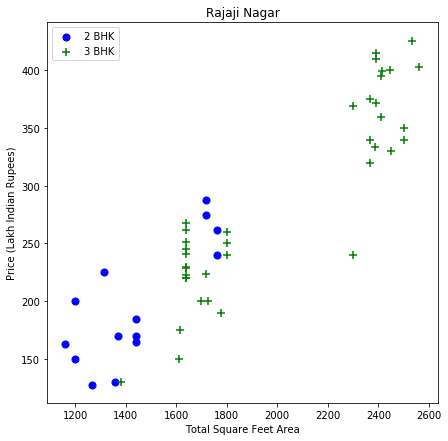

In [40]:
#Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like
# Plotting the datapoint w.r.t price and total sqft area
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df['BHK']==2)] 
    bhk3 = df[(df.location==location) & (df['BHK']==3)]
    matplotlib.rcParams["figure.figsize"] = (7,7)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

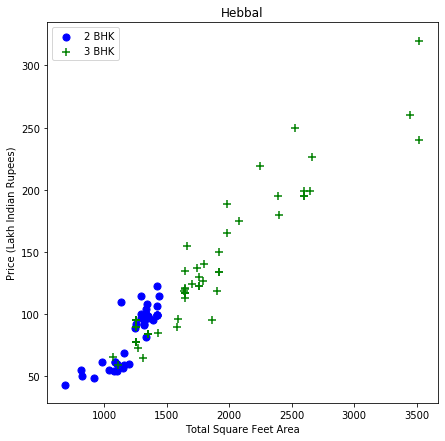

In [41]:
plot_scatter_chart(df7,"Hebbal")


#### In the plot it is clearly visible that some of the datapoints of 3BHK are projected lower than the datapoints of 2BHK. Which means that the price_per_sqft of 3BHK is less than 2BHK which can be considered as outliers and should be removed 

In [42]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'): #grouping the dataframe with loaction
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft), #calculating mean
                'std': np.std(bhk_df.price_per_sqft), #calculating standard deviation
                'count': bhk_df.shape[0] 
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values) 
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
df8.shape

(7342, 7)

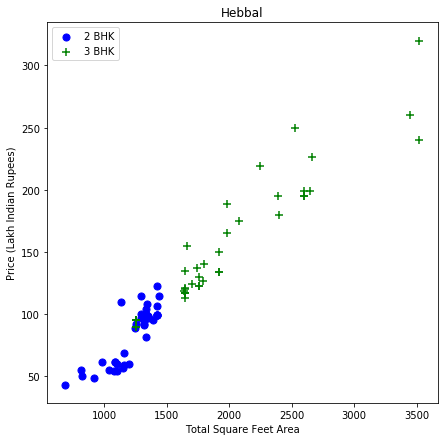

In [43]:
plot_scatter_chart(df8,"Hebbal")
# As compared to the previous dataframe this one has less outliers 

Text(0, 0.5, 'Count')

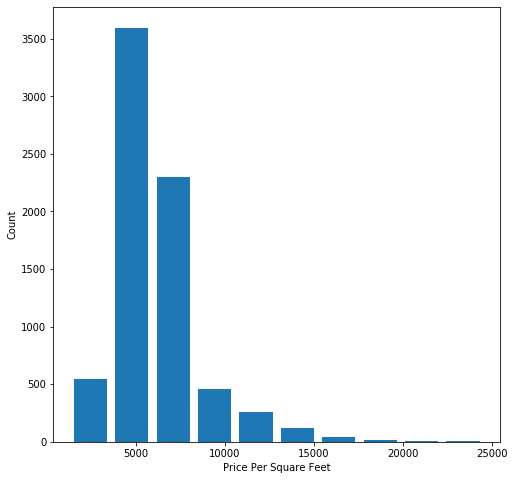

In [44]:
matplotlib.rcParams["figure.figsize"] = (8,8)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")
#showing the frequency of houses w.r.t Price per square feet

### Outlier Removal Using Bathrooms Feature


In [45]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [46]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
5306,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8527,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8616,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9351,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9682,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


#### We are taking an asumption that having bathrooms that are 2 more than the number of rooms is okay, but having more than that would be unusual. So, here we have some houses that have 4 bedrooms and 7 bathrooms this would be considered as outliers 

In [47]:
df8[df8.bath>df8['BHK']+2] #dataframe of houses which have more than BHK+2 bathrooms

,location,size,total_sqft,bath,price,BHK,price_per_sqft
1634,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5267,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6748,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8452,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [51]:
df9 = df8[df8.bath<df8['BHK']+2]
df9.shape

(7264, 7)

#### We are ready to train our model befpre that we are going to remove some unnecessary data i.e, size because we already have BHK column in which we have given the number of bedrooms and also the price_per_sqft because it was built just to find the outliers

In [52]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


## Using One Hot Encoding
#### Now in the dataframe we have location and it cannot be used for training because it's a string. So, for converting the location into numeric data we are going to use encoding

In [53]:
dummies = pd.get_dummies(df10.location) #creating dummies 
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns') #joining the dummies dataframe and df10
df11.head()

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
# As we have already defined the loaction using one hot encoding we can drop the location column
df12 = df11.drop('location',axis='columns')
df12.head()

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df12.shape

(7264, 244)

In [57]:
X = df12.drop(['price'],axis='columns') #droping the price column which is not needed 
X.head()

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
X.shape

(7264, 243)

In [59]:
y = df12.price
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

## Training the Model

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

## Using Linear Regression Model
Linear Regression is a Supervised Machine Learning Model for finding the relationship between independent variables and dependent variable. Linear regression performs the task to predict the response (dependent) variable value (y) based on a given (independent) explanatory variable (x). So, this regression technique finds out a linear relationship between x (input) and y (output).
This is why we are using the linear regression model to predict the house price

In [61]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
lr_model.score(X_test,y_test)

0.8581823360815791

## Testing the Model

In [62]:
def predict_price(location,sqft,bath,bhk):     #creating a function to predict the prices using the model
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_model.predict([x])[0]

### Question What would be the House price of 1000sqft area and have 2 rooms and 2 bathrooms in 1st Phase JP Nagar ?

In [63]:
predict_price('1st Phase JP Nagar',1000, 2, 2) 

83.61715202104814

In [108]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

87.61625225431982

In [109]:
predict_price('Indira Nagar',1000, 2, 2)

185.67713644023752

In [110]:
predict_price('Indira Nagar',1000, 3, 3)

189.6762366735092

## Conclusion 
Our model is successfully trained and able to predict the price on the basic of inputs given by the user
So after so many things Loading, Cleaning, Removing,etc. We finally trained our model which is now ready to be used to predict the House Price of Bengaluru